# Predicting the Price of Second Hand Cars in Cebu using K-Nearest Neighbor and Multiple Regression Algorithm

*•Arnado, Russ Azzi • Degamo, Ma. Lezly Grace • Mayormita, Riza Marie • Perez, Rodel • Tabañag, John Kaizer*

### Overview of the Study
***

Cebu with it's population of 7,396,898, is one of the most riches province in the philippines with its annual GDP of 1,156,592 pesos. With its booming population and busy people, the demand for cars is increasing rapidly. According to Land Transportation Office Region 7, The number of newly registered vehicles in Cebu will increase year and Major cities in Cebu along may  800,000 registered vehicles by the end of 2019.

The purchasing behavior of customers in the secondhand car market has been affected by the growing popularity of online classified advertisements and auto portals in the Philippines. The digital era’s technological advancements gave birth to various online platforms in which potential customers can explore in their journey of finding a car that would best suit their preferences. Various multi-brand dealers are strategically partnering with online classified advertisements and auto portals to make the car purchasing journey of potential buyers to be more convenient, accessible, and transparent. 

Due to the Tax Reform for Acceleration and Inclusion (TRAIN) Act in the Philippines, new vehicles have become more expensive which results to individuals resorting to certified and non-certified secondhand vehicles. The increase in demand on public transport and ride-sharing services to relieve traffic congestions will also expand the sales of used cars in the Philippines.

Buying secondhand cars may have its advantages (e.g., cheaper) but it also has its risks such determining the reliability of the seller and whether if a used car is overpriced or not. 

To help alleviate the worries of potential used car buyers in their purchasing journey, we will now try to develop a model that would predict the price of secondhand cars and identify which specific features/variables greatly affect it.

**Buying used cars has many advantages:**

- More savings
- Cheaper insurance cost
- Slower depreciation
- Extended warranty
- Good for the environment
- But there are also risks:

- Unknown reliability or treatment
- More frequent maintenance
- Hard to find an exact match of what you want
- Untouched warranty
- Lemon Car / Overpriced Ca

### Variables Used
***
- **ID** - Default primary key of the car records.
- **Title** - The title or the name of cars displayed in the scraped website.
- **Price** - The second hand price of the car.
- **Brand** - The brand name of the car.
- **Model** - The model name of the car.
- **Year of Manufacture** - Car year of manufactured.
- **Used** - A binary attribute that indicates wheather the item is second hand or not.
- **Transmission** - Can be manual or automatic transmission.
- **Color Family** - Car colors classified into color family.
- **Mileage (in km)** - The number of miles (in kilometer) a car have travelled or covered.
- **Body Type** - Car style or type.
- **Version** - Car's version number.
- **Description** - Cars description in the website listing.
- **Poster** -The one who post/sell the car in the website.
- **Poster Type** - The type of entity/seller who post the item in the website.
- **Fuel Type** - Car's fuel type
- **Location.2** - Poster/Seller's location
- **Date Posted** - Date of when the item is posted
- **name** - Name of the car
- **retail** - Original Retail price of the car in the market.
- **Post Age** - The age from when it is posted by the poster/seller in the website.





### Population, Data Collection & Sampling
***
The 20,088 data used for this project are car listings scraped from Carmudi and Philkotse websites. While, the retail price of the cars are scraped from Priceprice Auto and AutoSearch Manila.


Sources:
    
    https://www.sunstar.com.ph/article/410513/More-than-half-a-million-cars-clog-Cebus-streets
    Source: https://www.kenresearch.com/blog/2020/03/philippines-used-car-market-analysis/
    http://rsso07.psa.gov.ph/
    https://github.com/nicolelumagui/FTW-Capstone_Second-Hand-Cars-in-PH

***
## Section One: Import our Libraries
The first thing we need to do is import the libraries that will be using for this study. To visualize our data, we will be using `matplotlib` and `seaborn` to create heatmaps and a scatter matrix. To build our model, we will be using the `sklearn` library, and the evaluation will be taking place with the `statsmodels` library.

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.parser import parse
import numpy as np
from sklearn import preprocessing
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import graphviz
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Section Two: Load the Data into Pandas
After we've loaded our libraries, we can begin the process of importing and exploring our data. The dataset contains 20 explanatory variables and 1 dependent variable. After we've loaded the data into the data frame, we will need to filter our data and clean further to provide good insights.

In [8]:
cars = pd.read_csv("dataset/080119_pk and carmudi_complete.csv")
cars.head()


,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Version,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age
0,CAR006117,White Hyundai Grand Starex 2010 for sale in Ma...,665000,Hyundai,GrandStarex,2010,Yes,Manual,White,1.0,...,NaN,Hyundai Grand Starex 2010 Manual Used for sale...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,HyundaiGrandStarex,2060000,71
1,CAR006652,Selling Red Mitsubishi Mirage G4 2018 in Cainta,528000,Mitsubishi,MirageG4,2018,Yes,Automatic,Red,1.0,...,NaN,Mitsubishi supplies only the best quality vehi...,Gary Reyes,Individual,NaN,Pasig,10/07/2019,MitsubishiMirageG4,735000,22
2,CAR013853,Sell Silver 2011 Toyota Innova in General Sali...,595000,Toyota,Innova,2011,Yes,Manual,Silver,1.0,...,NaN,Toyota Innova 2011 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
3,CAR013855,Red Toyota Innova 2012 Manual Gasoline for sal...,495000,Toyota,Innova,2012,Yes,Manual,Red,1.0,...,NaN,Toyota Innova 2012 Manual Used for sale. The T...,Lito Palcone,Individual,NaN,General Salipada K. Pendatun,22/05/2019,ToyotaInnova,1025000,71
4,CAR014563,1989 Mercedes-Benz 260E 2.6 AT,255000,Mercedes-Benz,260E,1989,Yes,Automatic,Red,1.0,...,2.6,The 1989 Mercedes-Benz 260E with an Automatic ...,Autofairway - Ric Pandanan,Dealer,Gasoline,Las Pinas,31/05/2019,Mercedes-Benz260E,0,62


# Selecting Data

In [14]:
pd.set_option('display.max_rows', 500)
cars['Location.2'].value_counts()

Quezon City                     2975
Manila                          1892
Quezon                          1813
Makati                          1407
Philippines                     1271
Pasig                           1145
Paranaque                        865
Cebu City                        591
Las Pinas                        590
Marikina                         429
Taguig                           301
Muntinlupa                       300
Mandaue                          263
Cainta                           257
San Fernando                     257
Antipolo                         256
Mandaluyong                      237
Pasay                            210
Santiago                         191
Angeles                          183
General Salipada K. Pendatun     168
Caloocan                         166
Bacoor                           161
Davao City                       141
Meycauayan                       139
Valenzuela                       139
Dasmarinas                       115
I

In [15]:
final_df = cars.loc[(cars["Location.2"]=="Cebu") | (cars["Location.2"]=="Cebu City") | (cars["Location.2"]=="Consolacion")
                  | (cars["Location.2"]=="Cordova") | (cars["Location.2"]=="Danao") | (cars["Location.2"]=="Dumanjug")
                  | (cars["Location.2"]=="Lapu-Lapu")| (cars["Location.2"]=="Liloan")| (cars["Location.2"]=="Mandaue")
                   | (cars["Location.2"]=="Naga")  | (cars["Location.2"]=="Talisay") ]

In [16]:
#replaced null color values as 'No Color'. Same for fuel type.
final_df['Color Family']=final_df['Color Family'].fillna('Other') #('No Color')
final_df['Fuel Type']=final_df['Fuel Type'].fillna('No Fuel Type')

In [17]:
final_df['age_of_car']=2021-final_df['Year of Manufacture']
final_df.head()

,ID,Title,Price,Brand,Model,Year of Manufacture,Used,Transmission,Color Family,Mileage (in km),...,Description,Poster,Poster Type,Fuel Type,Location.2,Date Posted,name,retail,Post Age,age_of_car
5,CAR014565,1989 Toyota Crown 3.0 MT,195000,Toyota,Crown,1989,Yes,Manual,White,1.0,...,The 1989 Toyota Crown with an Manual transmiss...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,ToyotaCrown,0,62,32
6,CAR014569,1992 Mazda B2200 2.2 4x2 MT,250000,Mazda,B2200,1992,Yes,Manual,White,1.0,...,The 1992 Mazda B2200 with an Manual transmissi...,Alba Auto Sales,Dealer,Diesel,Mandaue,31/05/2019,MazdaB2200,991800,62,29
18,CAR014654,2000 Ford Expedition 4.6 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition with an Automatic tra...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,21
19,CAR014656,2000 Ford Expedition 4.6 XLT 4x2 AT,250000,Ford,Expedition,2000,Yes,Automatic,White,1.0,...,The 2000 Ford Expedition XLT with an Automatic...,Alba Auto Sales,Dealer,Gasoline,Mandaue,31/05/2019,FordExpedition,4258000,62,21
23,CAR014683,2011 Toyota Corolla Altis 1.6 V AT,419000,Toyota,Corolla Altis,2011,Yes,Automatic,Silver / Grey,1.0,...,The 2011 Toyota Corolla Altis V with an Automa...,Toyota Cebu - Pre Owned Vehicles,Dealer,Gasoline,Cebu,17/06/2019,ToyotaCorollaAltis,1131000,45,10


In [18]:
#deleted Poster, Version and Description
final_df.drop(columns=['Poster','Version','Description','Title','Used','name','Date Posted','Year of Manufacture'],inplace=True,axis=1)

In [19]:
final_df['Location.2'].value_counts()


Cebu City      591
Mandaue        263
Talisay         82
Cebu            68
Lapu-Lapu       45
Naga            25
Consolacion     11
Liloan          11
Cordova          3
Dumanjug         2
Danao            2
Name: Location.2, dtype: int64

In [20]:
final_df=final_df[final_df['age_of_car']>=0]
final_df=final_df[final_df['retail']>0]
final_df.head()

,ID,Price,Brand,Model,Transmission,Color Family,Mileage (in km),Body Type,Poster Type,Fuel Type,Location.2,retail,Post Age,age_of_car
6,CAR014569,250000,Mazda,B2200,Manual,White,1.0,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29
18,CAR014654,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,21
19,CAR014656,250000,Ford,Expedition,Automatic,White,1.0,SUV,Dealer,Gasoline,Mandaue,4258000,62,21
23,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,1.0,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10
30,CAR014768,330000,Ford,Fiesta,Automatic,Blue,1.0,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9


In [21]:
x=final_df['Mileage (in km)']
y=final_df['age_of_car']

In [22]:
#isolate x and y values that have mileage values in. In other words, we removed blank mileage records.
x_val=final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()]
y_val=final_df['age_of_car'].loc[~final_df['Mileage (in km)'].isnull()]

(0.0, 1000000.0)

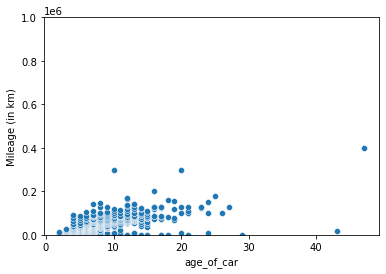

In [23]:
sns.scatterplot(y,x,data=final_df)
plt.ylim(0,1000000)

In [24]:
x_val_trim=x_val[x_val<700000]
y_val_trim=y_val[x_val<700000]

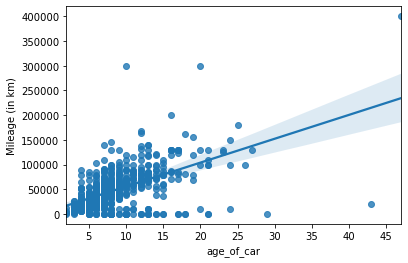

In [25]:
sns.regplot(y_val_trim,x_val_trim,data=final_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val_trim,x_val_trim)


In [26]:
#gets the age of car with no null values in the mileage
X=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].notnull()])
#gets the age of car with null values in the mileage
X_null=pd.DataFrame(final_df['age_of_car'].loc[final_df['Mileage (in km)'].isnull()])
#gets the mileage with no null values in the mileage
y=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].notnull()])
#gets the mileage with null values in the mileage
y_null=pd.DataFrame(final_df['Mileage (in km)'].loc[final_df['Mileage (in km)'].isnull()])


In [27]:
#might have to double check the neighbors
clf=KNeighborsRegressor(20,weights='distance')
trained_model=clf.fit(X,y)


In [28]:
#predicting imputed values and setting the index to match the X_null dataframe
imputed_val=pd.DataFrame(trained_model.predict(X_null),columns=['Mileage (in km)'])
X_null.reset_index(inplace=True)

In [29]:
#merge imputed values with your Yr of Manufacture pair
null_merged=pd.merge(X_null,imputed_val,how='outer',on=X_null.index)
#deleted useless key column that came from  the mileage dataframe
null_merged.drop('key_0',inplace=True,axis=1)
#index of Yr of Manufacture is set as the index
null_merged.set_index('index',inplace=True)


In [30]:
# merged them all together (Yr of Manufacture and Mileage) non null records
xy_merged=pd.concat([X,y],axis=1)
# merged the non nulls with the imputed or previous nulls
merged_df=pd.concat([null_merged,xy_merged],axis=0)
# rearranged indedx so it's prettier
merged_df=merged_df.sort_index()
merged_df.head()


,age_of_car,Mileage (in km)
6,29,1.0
18,21,1.0
19,21,1.0
23,10,1.0
30,9,1.0


In [31]:

# merge it with the whole df but original null mileage and age is still there
total_merge=pd.merge(final_df,merged_df,on=final_df.index)
# dropped the original null mileage and age. The new boys are in town!
total_merge.drop(['age_of_car_x','Mileage (in km)_x','key_0'],axis=1,inplace=True)
#renamed them
total_merge.columns=['id','price','brand','model','transmission','color','body_type','poster_type','fuel_type','location','retail','post_age_in_days','age_of_car','mileage_in_km']
total_merge.head()

,id,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
0,CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29,1.0
1,CAR014654,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
2,CAR014656,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
3,CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10,1.0
4,CAR014768,330000,Ford,Fiesta,Automatic,Blue,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9,1.0


In [32]:
#made the dataframe prettier by moving the id as index and deleting that pesky id title
total_merge.set_index('id',inplace=True)
total_merge.rename_axis(index=None,inplace=True)
total_merge.head()

,price,brand,model,transmission,color,body_type,poster_type,fuel_type,location,retail,post_age_in_days,age_of_car,mileage_in_km
CAR014569,250000,Mazda,B2200,Manual,White,Pickup / Truck,Dealer,Diesel,Mandaue,991800,62,29,1.0
CAR014654,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
CAR014656,250000,Ford,Expedition,Automatic,White,SUV,Dealer,Gasoline,Mandaue,4258000,62,21,1.0
CAR014683,419000,Toyota,Corolla Altis,Automatic,Silver / Grey,Saloon / Sedan,Dealer,Gasoline,Cebu,1131000,45,10,1.0
CAR014768,330000,Ford,Fiesta,Automatic,Blue,Saloon / Sedan,Dealer,Gasoline,Mandaue,875000,62,9,1.0


In [33]:
brand = pd.get_dummies(total_merge["brand"])
model = pd.get_dummies(total_merge["model"])
transmission = pd.get_dummies(total_merge["transmission"])
color = pd.get_dummies(total_merge["color"])
body_type = pd.get_dummies(total_merge["body_type"])
poster_type = pd.get_dummies(total_merge["poster_type"])
fuel_type = pd.get_dummies(total_merge["fuel_type"])
location = pd.get_dummies(total_merge["location"])


In [34]:
total_merge.drop("brand", axis=1, inplace=True)
total_merge.drop("model", axis=1, inplace=True)
total_merge.drop("transmission", axis=1, inplace=True)
total_merge.drop("color", axis=1, inplace=True)
total_merge.drop("body_type", axis=1, inplace=True)
total_merge.drop("fuel_type", axis=1, inplace=True)
total_merge.drop("location", axis=1, inplace=True)
total_merge.drop("poster_type", axis=1, inplace=True)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km
CAR014569,250000,991800,62,29,1.0
CAR014654,250000,4258000,62,21,1.0
CAR014656,250000,4258000,62,21,1.0
CAR014683,419000,1131000,45,10,1.0
CAR014768,330000,875000,62,9,1.0


In [35]:
total_merge = pd.concat([total_merge, brand, model, transmission, color, body_type, poster_type, fuel_type, location], axis=1)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,BMW,Bmw,Chevrolet,Ford,Honda,...,Cebu City,Consolacion,Cordova,Danao,Dumanjug,Lapu-Lapu,Liloan,Mandaue,Naga,Talisay
CAR014569,250000,991800,62,29,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CAR014654,250000,4258000,62,21,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
CAR014656,250000,4258000,62,21,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
CAR014683,419000,1131000,45,10,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAR014768,330000,875000,62,9,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
total_merge["IsAffordable"] = np.where(total_merge["price"] <= total_merge["retail"], 1, 0)
total_merge.head()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,BMW,Bmw,Chevrolet,Ford,Honda,...,Consolacion,Cordova,Danao,Dumanjug,Lapu-Lapu,Liloan,Mandaue,Naga,Talisay,IsAffordable
CAR014569,250000,991800,62,29,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR014654,250000,4258000,62,21,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
CAR014656,250000,4258000,62,21,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
CAR014683,419000,1131000,45,10,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CAR014768,330000,875000,62,9,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [38]:
# I just reassigned just cause lol
final_df=total_merge.copy()


In [39]:
from sklearn.model_selection import train_test_split
# splitting train and test data
X = final_df.drop("price", axis=1)
y = final_df["price"]
# splitting 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn import linear_model
#Training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [41]:
#Fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [43]:
#Accuracy of the model
lr=lr_model.score(X_train, y_train)
print('Accuracy of the Model :',lr)

Accuracy of the Model : 0.8999290760614016


In [44]:
total_merge.tail()

,price,retail,post_age_in_days,age_of_car,mileage_in_km,BMW,Bmw,Chevrolet,Ford,Honda,...,Consolacion,Cordova,Danao,Dumanjug,Lapu-Lapu,Liloan,Mandaue,Naga,Talisay,IsAffordable
CAR018809,720000,881000,189,3,6083.60,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019467,390000,828000,62,13,62634.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019701,380000,876000,189,12,75951.85,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
CAR019713,780000,2225000,62,12,75951.85,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
CAR019859,485000,1345000,38,11,69304.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
import statsmodels.api as sm


X = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     35.97
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          2.88e-242
Time:                        13:17:17   Log-Likelihood:                -11070.
No. Observations:                 811   AIC:                         2.247e+04
Df Residuals:                     648   BIC:                         2.323e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
retail                                 0.3061      0.156      1.960      0.050      -0.001       0.613
post_age_in_days                     796.2911    281.674      2.827      0.005     243.186    1349.396
age_of_car                         -5.532e+04   2578.382    -21.456      0.000   -6.04e+04   -5.03e+04
mileage_in_km                         -0.3020      0.082     -3.683      0.000      -0.463      -0.141
BMW                                 1.006e+05   2.85e+05      0.353      0.724   -4.58e+05    6.59e+05
Bmw                                -2.335e+05   1.92e+05     -1.216      0.224    -6.1e+05    1.43e+05
Chevrolet                           6.379e+04   1.19e+05      0.535      0.593   -1.71e+05    2.98e+05
Ford                                3.711e+04   7.52e+04      0.494      0.622    -1.1e+05    1.85e+05
Honda                               1.112e+05   1.27e+05      0.873      0.383   -1.39e+05    3.61e+05
Hummer                              4.634e+05   3.31e+05      1.398      0.163   -1.87e+05    1.11e+06
Hyundai                             1.169e+04   1.09e+05      0.107      0.915   -2.02e+05    2.26e+05
Isuzu                               8708.2265   1.42e+05      0.061      0.951    -2.7e+05    2.87e+05
Jeep                                2.467e+05   1.09e+05      2.257      0.024    3.21e+04    4.61e+05
Kia                                -1.479e+05    1.3e+05     -1.140      0.255   -4.03e+05    1.07e+05
Lexus                               3.935e+04   2.29e+05      0.171      0.864   -4.11e+05     4.9e+05
Mazda                               8.951e+04   1.24e+05      0.720      0.472   -1.55e+05    3.34e+05
Mercedes-Benz                      -3.819e+05   5.68e+05     -0.672      0.502    -1.5e+06    7.34e+05
Mitsubishi                          3.657e+04   1.36e+05      0.270      0.787    -2.3e+05    3.03e+05
Nissan                              2.792e+04   1.35e+05      0.207      0.836   -2.37e+05    2.92e+05
Subaru                              7.026e+04   1.13e+05      0.623      0.533   -1.51e+05    2.92e+05
Suzuki                             -2.561e+04   2.04e+05     -0.125      0.900   -4.27e+05    3.76e+05
Toyota                              3.035e+05   8.11e+04      3.744      0.000    1.44e+05    4.63e+05
118D                               -1.797e+05   2.55e+05     -0.706      0.481    -6.8e+05     3.2e+05
2                                  -1.687e+05   2.09e+05     -0.807      0.420   -5.79e+05    2.42e+05
3                                  -6.903e+04   1.38e+05     -0.501      0.617    -3.4e+05    2.02e+05
320I                               -1.721e+05    2.2e+05     -0.781      0.435   -6.05e+05     2.6e+05
323                                    0.0001      0.000      0.875      0.382      -0.000      

In [155]:
display(total_merge.isnull().any())

price                                 False
retail                                False
post_age_in_days                      False
age_of_car                            False
mileage_in_km                         False
BMW                                   False
Bmw                                   False
Chevrolet                             False
Ford                                  False
Honda                                 False
Hummer                                False
Hyundai                               False
Isuzu                                 False
Jeep                                  False
Kia                                   False
Lexus                                 False
Mazda                                 False
Mercedes-Benz                         False
Mitsubishi                            False
Nissan                                False
Subaru                                False
Suzuki                                False
Toyota                          